# Bike Sharing Daily Model

<div style="flex:50%; padding:5px;">
    <img src="00_2141_Bicycle-sharing_systems_-_Sweden.jpg" style="width:65%">
</div>

# Check List:
    1 Importing Libraries
    2 Loading Data
    3 Discovering Data
        . Missing Values
        . Classes Values
        . Outliers
    4 Feature Engineering 
        . Scaling
        . Dropping Unimportant Columns
    5 Spliting Data
    6 Initialize estimators and hyperparameters
    7 Randomized Search CV
    8 The best Model Training
    9 Saving the model

# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score

In [6]:
from sklearn.pipeline import Pipeline

# Loading Data

In [86]:
df = pd.read_csv('bike_sharing_daily.csv')

In [87]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


# Discovering Data

### Missing Vlues

In [89]:
# missing values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [90]:
df.sample()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
702,703,12/3/2012,4,1,12,0,1,1,1,0.4525,0.7675,0.082721,555,5679,6234


### Classes Values

In [91]:
df['season'].value_counts()    

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [92]:
df['yr'].value_counts()  # 0 --> 2011  & 1 --> 2012 

1    366
0    365
Name: yr, dtype: int64

In [93]:
df['holiday'].value_counts()    # imbalanced data

0    710
1     21
Name: holiday, dtype: int64

In [94]:
df['weekday'].value_counts()

6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64

In [95]:
df['workingday'].value_counts() # imbalanced data

1    500
0    231
Name: workingday, dtype: int64

### Outliers

<Axes: >

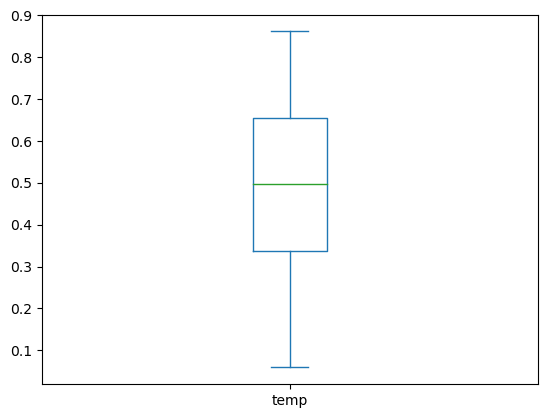

In [96]:
df['temp'].plot.box()

<Axes: >

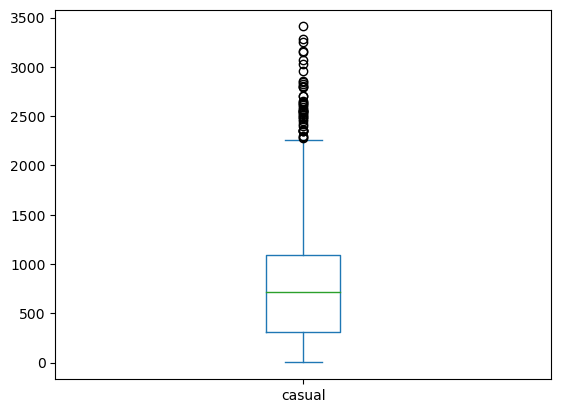

In [97]:
df['casual'].plot.box()

<Axes: >

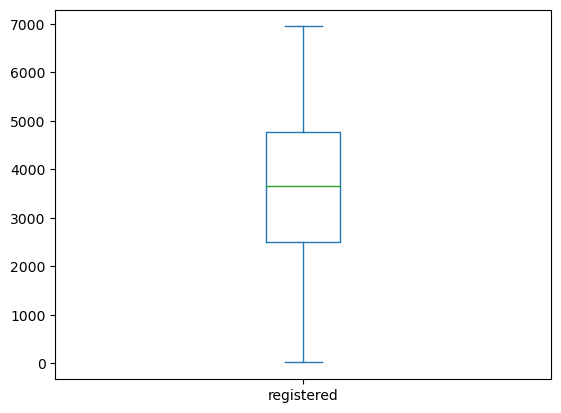

In [98]:
df['registered'].plot.box()

<Axes: >

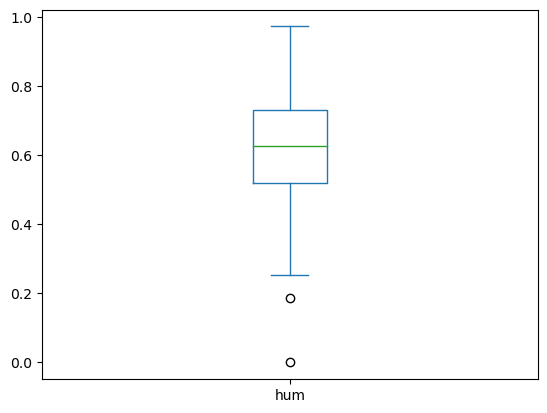

In [99]:
df['hum'].plot.box()

<Axes: >

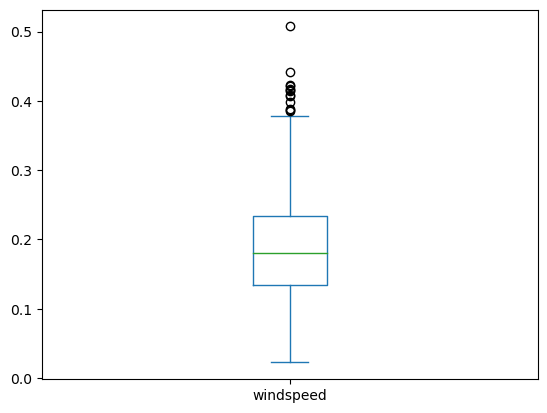

In [100]:
df['windspeed'].plot.box()

# Feature Engineering

### Scaling

sc = StandardScaler()
df['casual'] = sc.fit_transform(df[['casual']])
df['registered'] = sc.fit_transform(df[['registered']])

### Dropping unimportant columns

In [101]:
df = df.drop(columns=['instant', 'dteday', 'yr'], axis=1)

In [102]:
df.sample()

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
577,3,7,0,2,1,1,0.713333,0.704167,0.165425,968,6248,7216


<Axes: >

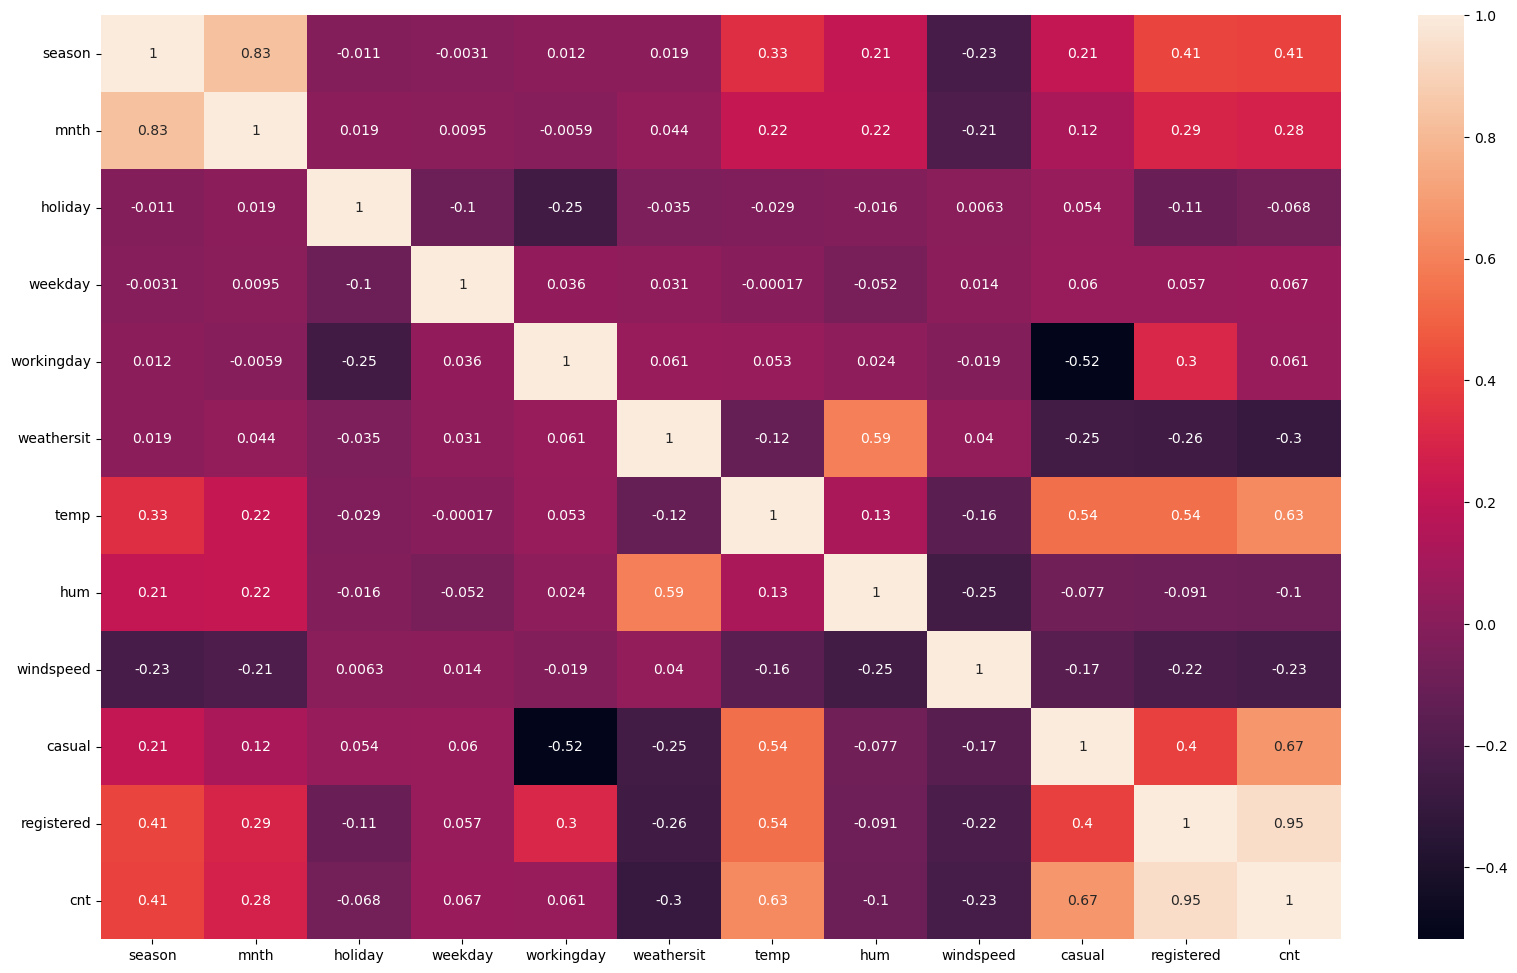

In [103]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)

# Spliting Data

In [104]:
X = df.drop('cnt', axis=1).values
y = df['cnt'].values

In [105]:
X.shape

(731, 11)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(584, 11)
(147, 11)


# Initialize estimators and hyperparameters

In [107]:
# Initialize the estimators
reg1 = LinearRegression()
reg2 = Lasso()
reg3 = LogisticRegression()
reg4 = Ridge()
reg5 = GradientBoostingRegressor()
reg6 = RandomForestRegressor()
reg7 = SVR()
reg8 = KNeighborsRegressor()


In [108]:
# Initialize the hyperparameters
param1 = {}
param1['regressor'] = [reg1]

param2 = {}
param2['regressor'] = [reg2]
param2['regressor__alpha'] = [0.1, 0.01, 0.001]

param3 = {}
param3['regressor'] = [reg3]
param3['regressor__C'] = [1.0, 10, 100]

param4 = {}
param4['regressor'] = [reg4]
param4['regressor__alpha'] = [0.1, 0.01, 0.001]

param5 = {}
param5['regressor'] = [reg5]
param5['regressor__alpha'] = [0.1, 0.5, 0.9, 1, 10]
param5['regressor__n_estimators'] = [10, 100, 1000]
param5['regressor__learning_rate'] = [0.1, 0.01, 0.001]
param5['regressor__learning_rate'] = [0.1, 0.01, 0.001]
param5['regressor__criterion'] = ['friedman_mse', 'squared_error']

param6 = {}
param6['regressor'] = [reg6]
param6['regressor__n_estimators'] = [10, 100, 1000]
param6['regressor__criterion'] = ["squared_error", "absolute_error", "friedman_mse", "poisson"]

param7 = {}
param7['regressor'] = [reg7]
param7['regressor__C'] = [1.0, 10, 100]
param7['regressor__kernel'] = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

param8 = {}
param8['regressor'] = [reg8]
param8['regressor__n_neighbors'] = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [109]:
pipeline = Pipeline([('regressor', reg1)])
params = [param2, param3, param4, param5, param6, param7, param8]


# Randomized Search CV

In [116]:
from sklearn.metrics.pairwise import rbf_kernel
X_train_kernel = rbf_kernel(X_train)

In [117]:
%%time
# Train the random search model
rs = RandomizedSearchCV(pipeline, params, cv=3, scoring='r2').fit(X_train_kernel, y_train)

C:\Users\engmi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\engmi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\engmi\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\engmi\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit

CPU times: total: 46.8 s
Wall time: 41.4 s


In [111]:
# Best performing model and its corresponding hyperparameters
rs.best_params_

{'regressor__alpha': 0.01, 'regressor': Ridge()}

In [112]:
# r2 score for the best model
rs.best_score_

0.9999999990394987

# The best Model Training

In [118]:
model = GradientBoostingRegressor(alpha=0.1,criterion= 'friedman_mse', learning_rate= 0.1, n_estimators= 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [119]:
r2_score(y_test, y_pred)

0.9980538864068982

In [120]:
mean_squared_error(y_test, y_pred)

7803.686428550463

# Saving the model

In [121]:
import joblib

In [122]:
joblib.dump(model, 'bike_sharing_daily_model.p')

['bike_sharing_daily_model.p']

## <span style="color:Brown; font-family:Arial;">Thanks, OmaymaAli</span>